In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
clusdf = pd.read_csv('Mall_Customers.csv')

In [71]:
clusdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
clusdf['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

In [73]:
clusdf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [74]:
clusdf.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [75]:
labels = ['18 and below','18-40','40-60','60+']
bins = [0,18,40,60,70]
clusdf['age_group'] = pd.cut(clusdf.Age, bins, labels = labels, include_lowest = True)
clusdf

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_group
0,1,Male,19,15,39,18-40
1,2,Male,21,15,81,18-40
2,3,Female,20,16,6,18-40
3,4,Female,23,16,77,18-40
4,5,Female,31,17,40,18-40
...,...,...,...,...,...,...
195,196,Female,35,120,79,18-40
196,197,Female,45,126,28,40-60
197,198,Male,32,126,74,18-40
198,199,Male,32,137,18,18-40


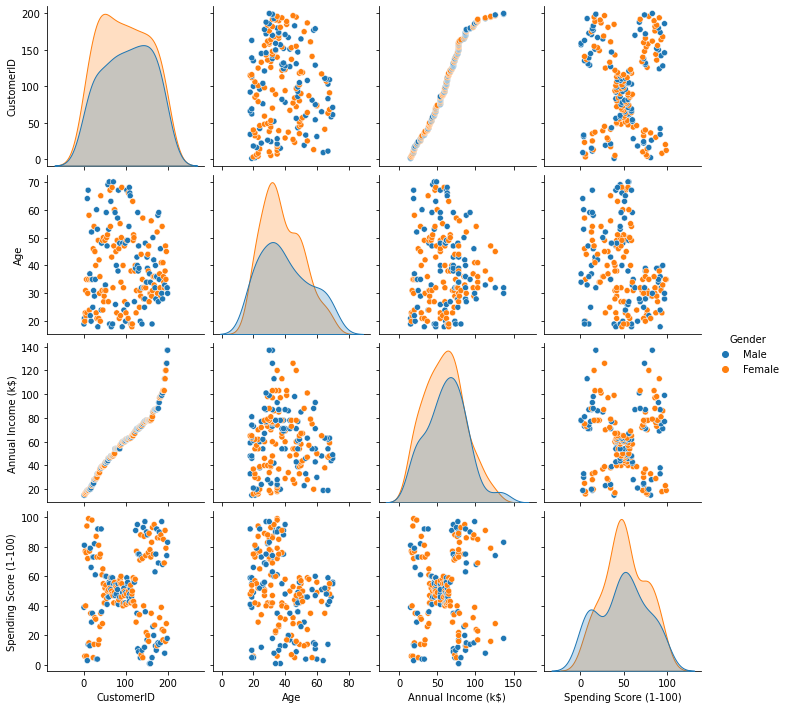

In [76]:
sns.pairplot(clusdf,hue ='Gender')

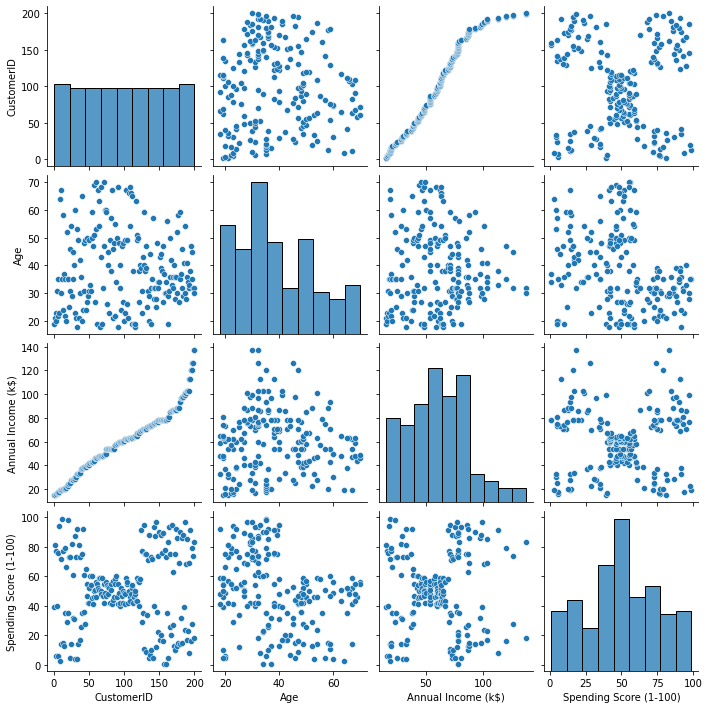

In [77]:
sns.pairplot(clusdf)

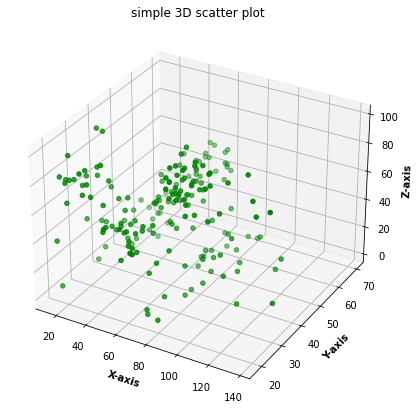

In [78]:
Z = clusdf['Spending Score (1-100)']
X = clusdf['Annual Income (k$)']
Y = clusdf['Age']
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(X, Y, Z, color = "green")
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')

# show plot
plt.show()

In [79]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_samples

In [80]:
clusdf1 = clusdf.drop(labels = ['CustomerID','age_group'],axis = 1)

In [81]:
clusdf1['Gender'] = clusdf1['Gender'] == 'Male'

In [82]:
clusdf1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,True,19,15,39
1,True,21,15,81
2,False,20,16,6
3,False,23,16,77
4,False,31,17,40


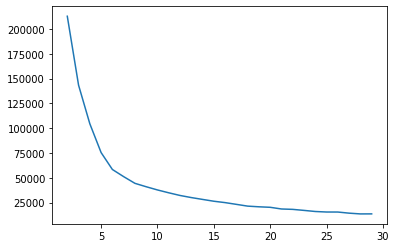

In [83]:
scorelist=[]
X = clusdf1
for k in range (2, 30):
    kmeans = KMeans(n_clusters = k, max_iter=300)
    kmeans.fit(X)
    scorelist.append(kmeans.inertia_)

plt.plot(range(2,30),scorelist)
plt.show()

In [84]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_clusdf = kmeans.fit_predict(X)

# labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [85]:
clusdf['Category'] = y_clusdf

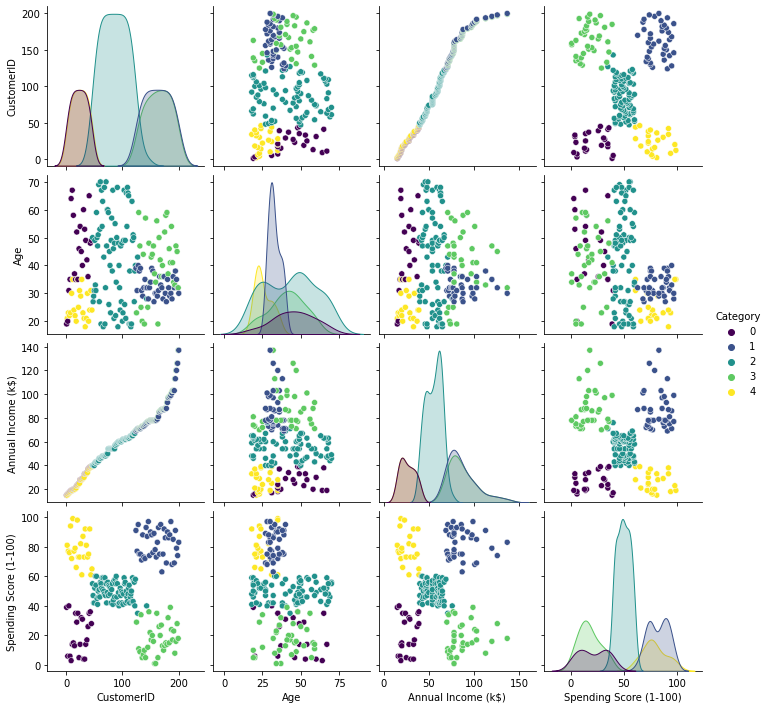

In [91]:
sns.pairplot(clusdf,hue ='Category', palette = 'viridis')

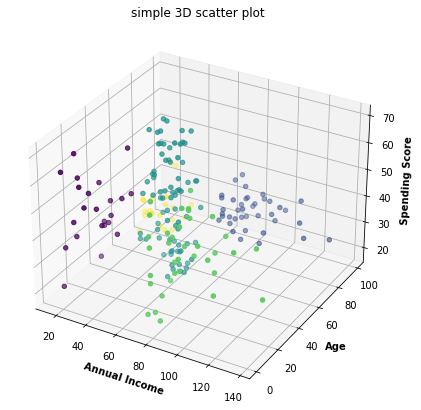

In [87]:
Y = clusdf['Spending Score (1-100)']
X = clusdf['Annual Income (k$)']
Z = clusdf['Age']
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(X, Y, Z,  c=clusdf['Category'])
plt.title("simple 3D scatter plot")
ax.set_xlabel('Annual Income', fontweight ='bold')
ax.set_ylabel('Age', fontweight ='bold')
ax.set_zlabel('Spending Score', fontweight ='bold')

# show plot
plt.show()

In [93]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# clusdf['labels'] =  labels
trace1 = go.Scatter3d(
    x= clusdf['Age'],
    y= clusdf['Spending Score (1-100)'],
    z= clusdf['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = clusdf['Category'], 
        size= 10,
        line=dict(
            color= clusdf['Category'],
            width= 12
        ),
        opacity=0.8
     )
)
    
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [89]:
clusdf

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_group,Category
0,1,Male,19,15,39,18-40,0
1,2,Male,21,15,81,18-40,4
2,3,Female,20,16,6,18-40,0
3,4,Female,23,16,77,18-40,4
4,5,Female,31,17,40,18-40,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,18-40,1
196,197,Female,45,126,28,40-60,3
197,198,Male,32,126,74,18-40,1
198,199,Male,32,137,18,18-40,3


We can see that based on clusters made, the 5 clusters determine the different patterns of spending based on their incomes mainly. We can see the category 0 are people who earn less and spend less, hence can be considered frugal, Category 1 are target audience as they earn more and spend more. Category 2 also can be considered as target audience as they earn average and spend average. Category 4 can ben considered spendthrifts and category 3 can be considered miser.
